<a href="https://colab.research.google.com/github/IvanRavarotto/Precios_Casas/blob/main/Precio_Casas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicción de precios de casas (Supervisado - Regresión)
* Variables: metros_cuadrados, habitaciones, baños, ubicación, antigüedad
* Objetivo: precio
* Tarea: Entrenar un modelo para predecir el precio de una casa.

Trabajando en base al dataset brindado en este proyecto, debo diseñar un modelo 'supervisado' y de 'regresión' para que pueda precedir el precio de una casa que sea registrada como 'nueva'.

#Carga de dataset
### Columnas:
metros_cuadrados | habitaciones | banos | antiguedad | ubicacion | precio

In [80]:
#Importación de pandas para la carga del dataset a utilziar, en este caso desde un repositorio de github
import pandas as pd

# Se trae la información mediante el crudo (raw) desde github
df = pd.read_csv('https://raw.githubusercontent.com/IvanRavarotto/Precios_Casas/refs/heads/main/dataset_precios_casas.csv')

#Tratamiento de datos:
* Se define columna principal 'target'
* Formulario para ingreso de una nueva casa

In [81]:
Y = df['precio']
X = df.drop('precio', axis=1)
# Utilizamos la columna "precio" como "target" de busqueda para indicarle al modelo cual es nuestra variable objetivo
# El resto de columnas las dejamos en otra variable, eliminando a su vez la columna de "precio"


In [82]:
# Formulario de carga de datos de la nueva casa para precedir el precio:
metros_cuadrados = 10000 # @param {type:"number", min:10,max:10000}
habitaciones = 3 # @param {type:"number", min:1, max:100}
banios = 1 # @param {type:"number", min:1, max:100}
antiguedad = 1 # @param {type:"number", min:1, max:100}
ubicacion = "rural" # @param ["urbana", "suburbana", "rural"]

casaNueva = {
    'metros_cuadrados': metros_cuadrados,
    'habitaciones': habitaciones,
    'banos': banios,
    'antiguedad': antiguedad,
    'ubicacion': ubicacion,
    'precio': 0
}

In [83]:
from sklearn.ensemble import GradientBoostingRegressor
#Se importa libreria para separar la base de datos para entrenamiento y pruebas:
from sklearn.model_selection import train_test_split

# Aplicar One-Hot Encoding a la columna 'ubicacion' antes de dividir los datos
X = pd.get_dummies(X, columns=['ubicacion'], drop_first=True)

#Se separan los datos 80/20 para entrenamiento y pruebas
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
#test_size se utiliza para indicar cual es el porcentaje de los datos que seran utilziados para testeo/prueba

In [90]:
import time
from sklearn.metrics import r2_score

# Medir el tiempo de entrenamiento
start_time = time.time()
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, Y_train)
end_time = time.time()
training_time = end_time - start_time

print(f"Tiempo de entrenamiento del modelo: {training_time:.2f} segundos")

# Realizar predicciones sobre el conjunto de prueba para calcular el R-squared
Y_pred = model.predict(X_test)
r_squared = r2_score(Y_test, Y_pred)

porcentaje = r_squared * 100;

print(f"R-squared (Coeficiente de determinación) en el conjunto de prueba: {porcentaje:.2f}%")

Tiempo de entrenamiento del modelo: 0.23 segundos
R-squared (Coeficiente de determinación) en el conjunto de prueba: 99.51%


In [85]:
# Realizar predicciones sobre el conjunto de prueba
Y_pred = model.predict(X_test)

# Crear un DataFrame para facilitar la comparación
results_df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})

# Mostrar las primeras filas de la comparación
display(results_df.head())

,Actual,Predicted
203,307587,311908.464015
266,256140,253942.121000
152,97729,103368.183796
9,192922,185276.150353
233,171917,171089.268927


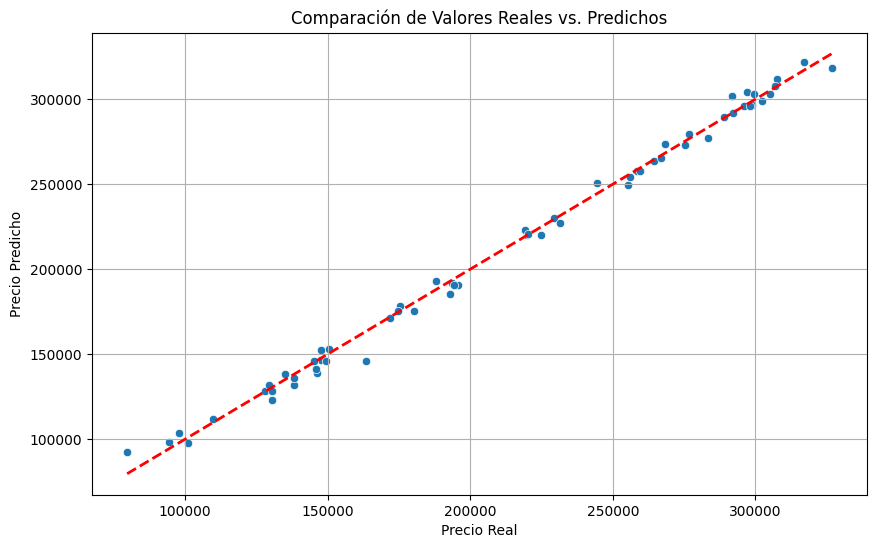

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=results_df)
plt.title('Comparación de Valores Reales vs. Predichos')
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.plot([results_df['Actual'].min(), results_df['Actual'].max()], [results_df['Actual'].min(), results_df['Actual'].max()], color='red', linestyle='--', lw=2)
plt.grid(True)
plt.show()

In [87]:
# Crear un DataFrame para la nueva casa con su precio predicho
new_house_result = pd.DataFrame([{'Actual': None, 'Predicted': precio_predicho[0]}])

# Concatenar con el DataFrame results_df existente
results_df_with_new_house = pd.concat([results_df, new_house_result], ignore_index=True)

# Mostrar el DataFrame actualizado
display(results_df_with_new_house.tail(10))

,Actual,Predicted
51,244406,250478.875919
52,195841,190746.994177
53,187894,193055.245459
54,295998,296085.458687
55,194376,190599.671562
56,297940,295782.057571
57,79683,92538.163701
58,138375,136159.728627
59,220203,220809.738118
60,None,319493.582485


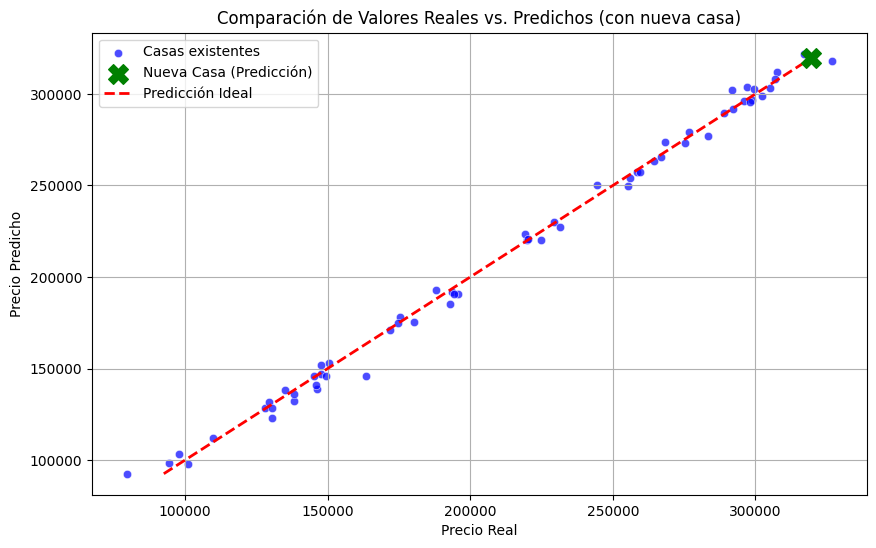

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Filtrar las casas existentes (donde 'Actual' no es nulo)
existing_houses_df = results_df_with_new_house.dropna(subset=['Actual'])
sns.scatterplot(x='Actual', y='Predicted', data=existing_houses_df, label='Casas existentes', color='blue', alpha=0.7)

# Obtener la predicción de la nueva casa (donde 'Actual' es nulo)
new_house_predicted_price = results_df_with_new_house[results_df_with_new_house['Actual'].isnull()]['Predicted'].iloc[0]

# Trazar la nueva casa con un marcador y color diferente
# Para representarla en el gráfico Actual vs. Predicho sin un valor 'Actual' conocido,
# la posicionamos en la línea de predicción ideal (donde Actual == Predicted).
plt.scatter(new_house_predicted_price, new_house_predicted_price,
            color='green', marker='X', s=200, label='Nueva Casa (Predicción)', zorder=5) # zorder asegura que esté encima de otros puntos

plt.title('Comparación de Valores Reales vs. Predichos (con nueva casa)')
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')

# Trazar la línea de predicción ideal
min_val_plot = results_df_with_new_house['Predicted'].min()
max_val_plot = results_df_with_new_house['Predicted'].max()
plt.plot([min_val_plot, max_val_plot], [min_val_plot, max_val_plot], color='red', linestyle='--', lw=2, label='Predicción Ideal')

plt.grid(True)
plt.legend()
plt.show()

In [89]:
# Preparar la nueva casa para la predicción
nueva_casa_df = pd.DataFrame([casaNueva])

# Aplicar One-Hot Encoding a la columna 'ubicacion' de la nueva casa
# Asegurarse de que las columnas coincidan con las usadas para el entrenamiento
ubicacion_encoded = pd.get_dummies(nueva_casa_df['ubicacion'], prefix='ubicacion', drop_first=True)
nueva_casa_preparada = pd.concat([nueva_casa_df.drop(columns=['ubicacion', 'precio']), ubicacion_encoded], axis=1)

# Asegurarse de que las columnas de la nueva casa coincidan con las de X_train
# Esto es crucial si 'ubicacion' solo tiene un valor en nueva_casa_df y no crea todas las columnas esperadas
# Crear una serie de ceros para las columnas de ubicación que puedan faltar
missing_cols = set(X_train.columns) - set(nueva_casa_preparada.columns)
for c in missing_cols:
    nueva_casa_preparada[c] = 0

# Asegurarse de que el orden de las columnas sea el mismo
nueva_casa_preparada = nueva_casa_preparada[X_train.columns]

# Realizar la predicción
precio_predicho = model.predict(nueva_casa_preparada)

print(f"El precio predicho para la nueva casa es: ${precio_predicho[0]:,.2f}")

El precio predicho para la nueva casa es: $319,493.58
